In [1]:
'''
Gender Prediction in Hollywood Movies
-------------------------------------
Objective: Predict whether the lead actor is male or female based on various attributes
           like dialogue distribution, actor counts, ages, and other movie characteristics.
'''

In [ ]:
# ============================================
# 📦 Imports and Setup for Classification Task
# ============================================

# Data manipulation & visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model selection & evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [59]:
# ====================
# 📂 Load Movie Dataset
# ====================

# Load training data
movies_data = pd.read_csv('/content/train.csv')

# Display first few rows
movies_data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


🔹**Data Analysis Task**

**Question 1: Do men or women dominate speaking roles in Hollywood movies?**

**Answer:**

The analysis clearly shows that:

- 🗣 **Men dominate speaking roles** in Hollywood films, contributing a significantly higher **overall percentage of total words spoken**.
- 📉 Over time, while there have been occasional increases in female dialogue, the **yearly trend consistently favors male characters** in terms of word count.
- Even in movies where women had more lines, the cumulative data across all years reaffirms the **dominance of male-speaking roles**.

Visualizations like the **pie chart** (overall share) and **line graph** (year-wise trends) provide strong support for this conclusion.


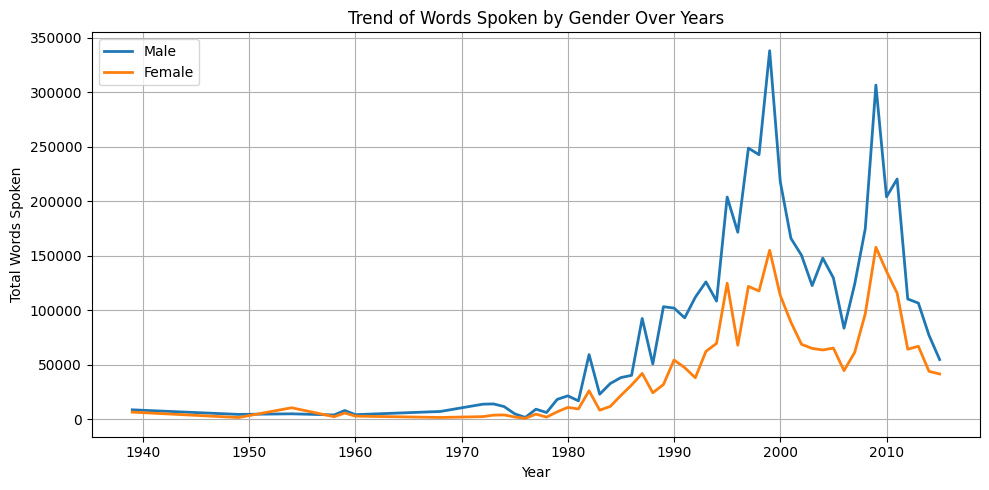

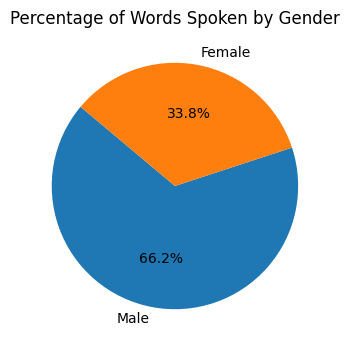

In [63]:
# ==========================================
# 🎭 Gender Distribution in Speaking Roles
# ==========================================

# 🔹 Total words spoken by gender across all movies
total_male_words = movies_data['Number words male'].sum()
total_female_words = movies_data['Number words female'].sum()

# 🔹 Words spoken by gender over the years
yearly = movies_data.groupby('Year')[['Number words male', 'Number words female']].sum()

# 📈 Line Plot: Total words spoken by gender over time
plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly['Number words male'], label='Male', linewidth=2)
plt.plot(yearly.index, yearly['Number words female'], label='Female', linewidth=2)
plt.title('Trend of Words Spoken by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Total Words Spoken')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Pie Chart: Overall percentage of words spoken by gender
plt.figure(figsize=(4, 4))
plt.pie(
    [total_male_words, total_female_words],
    labels=['Male', 'Female'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Percentage of Words Spoken by Gender')
plt.show()

**Question 2: Has gender balance in speaking roles changed over time?**

**Answer:**

The data shows a **steady rise in the percentage of dialogue spoken by female characters** since the 1990s. However:

- 🔺 Even with the increase, **female dialogue has never crossed the 50% mark**, indicating that male characters still dominate in terms of screen time.
- 🎬 The upward trend could partly be influenced by the **increasing number of movies released** over the years, which gives more opportunities for all characters.
- 👥 Despite growth in female representation, the persistent **imbalance may reflect the continued dominance of male characters and narratives** in mainstream Hollywood.

The first graph visualizes the **percentage of dialogue by gender** alongside the **number of movies released per year**, while the second shows the **absolute word count trend** over time.


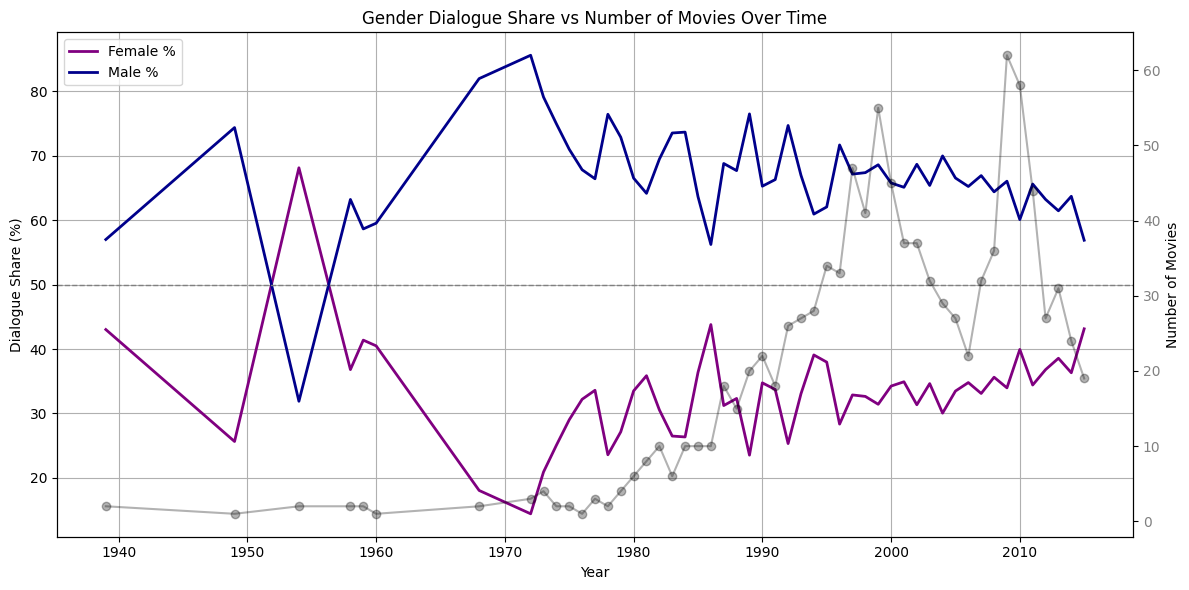

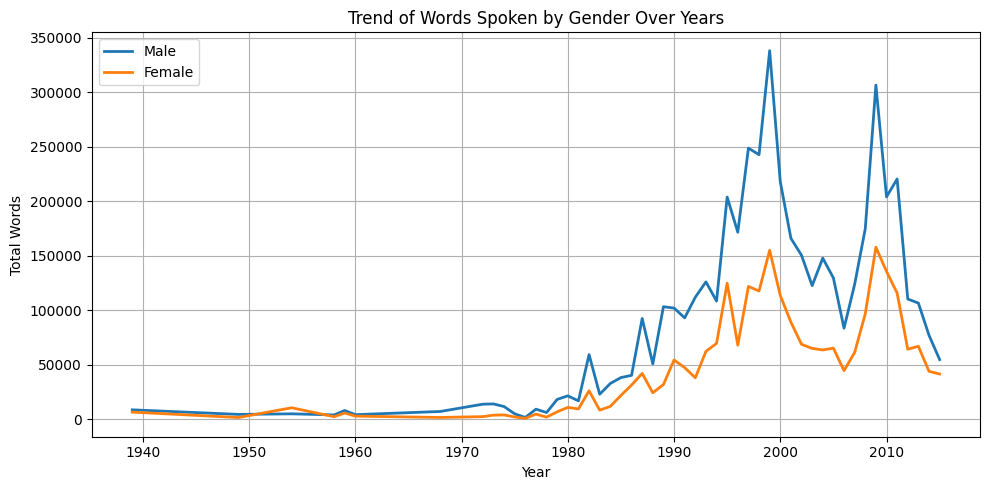

In [64]:
# ==============================================
# 📊 Has Gender Balance in Dialogue Changed Over Time?
# ==============================================

# --- Data preparation ---
yearly = movies_data.groupby('Year')[['Number words male', 'Number words female']].sum()
yearly['Total'] = yearly['Number words male'] + yearly['Number words female']
yearly['Female %'] = (yearly['Number words female'] / yearly['Total']) * 100
yearly['Male %'] = (yearly['Number words male'] / yearly['Total']) * 100

# Count of movies per year
movie_counts = movies_data.groupby('Year').size()

# --- Plot: Gender % vs Movie Counts ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plots for male/female percentage over years
ax1.plot(yearly.index, yearly['Female %'], label='Female %', color='purple', linewidth=2)
ax1.plot(yearly.index, yearly['Male %'], label='Male %', color='darkblue', linewidth=2)
ax1.axhline(50, color='gray', linestyle='--', linewidth=1)
ax1.set_ylabel('Dialogue Share (%)')
ax1.set_xlabel('Year')
ax1.set_title('Gender Dialogue Share vs Number of Movies Over Time')
ax1.grid(True)
ax1.legend(loc='upper left')

# Overlay: Number of movies per year
ax2 = ax1.twinx()
ax2.plot(movie_counts.index, movie_counts.values, marker='o', color='black', alpha=0.3)
ax2.set_ylabel('Number of Movies', color='black')
ax2.tick_params(axis='y', labelcolor='gray')

plt.tight_layout()
plt.show()

# --- Optional: Raw Word Trends by Gender ---
plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly['Number words male'], label='Male', linewidth=2)
plt.plot(yearly.index, yearly['Number words female'], label='Female', linewidth=2)
plt.title('Trend of Words Spoken by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Total Words')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Question 3: Do films in which men do more speaking make a lot more money than films in which women speak more?**

**Answer:**

This question doesn’t have a simple yes or no answer. The boxplot reveals that:

- 💸 **Male-dominant films** appear to have higher gross revenues overall, but a large part of this is due to **outliers** — high-earning blockbusters, franchises, or movies with popular male leads.
- 🎬 The **central distribution** (median and interquartile range) of earnings for male- and female-dominant films is quite similar.
- 👥 Because there are **fewer female-dominant films**, and other confounding factors like genre, budget, star power, or marketing influence earnings, we **can’t attribute profitability purely to speaking dominance**.

So, while the trend suggests male-dominated films might earn more, **speaking role dominance alone doesn't determine commercial success**.


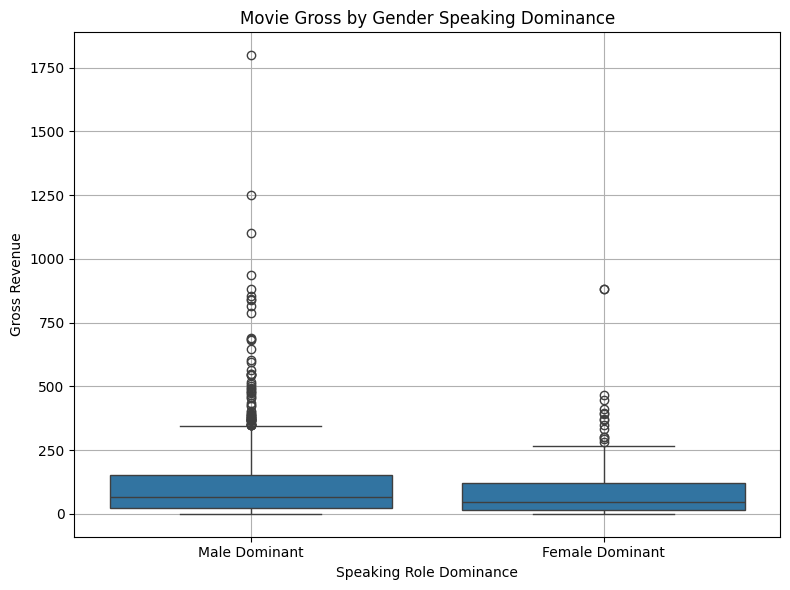

In [65]:
# ===================================================
# 💰 Do Male-Dominant Films Earn More at the Box Office?
# ===================================================

# Categorize movies based on who speaks more
movies_data['Speaking Dominance'] = movies_data.apply(
    lambda row: 'Male Dominant' if row['Number words male'] > row['Number words female']
    else ('Female Dominant' if row['Number words female'] > row['Number words male'] else 'Equal'),
    axis=1
)

# 📦 Boxplot: Gross Revenue by Gender Dialogue Dominance
plt.figure(figsize=(8, 6))
sns.boxplot(data=movies_data, x='Speaking Dominance', y='Gross')
plt.title('Movie Gross by Gender Speaking Dominance')
plt.xlabel('Speaking Role Dominance')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


🔹Separating Test Data for future testing

In [15]:
# Step 1: Randomly sample 200 rows for testing
test_data = movies_data.sample(n=200, random_state=42)

# Step 2: Remove those 200 rows from the original DataFrame to create the new training set
train_data = movies_data.drop(test_data.index)

# Now `train_df` is your training data and `test_df` is your testing data
# the index have been reset
test_data = test_data.reset_index(drop=True)
train_data = train_data.reset_index(drop=True)

🔹 Create Validation Set


In [26]:
# Create a 200-sample test set from train_data
val_df = train_data.sample(n=100, random_state=42).reset_index(drop=True)
train_df = train_data.drop(val_df.index).reset_index(drop=True)

🔹 Feature Engineering

In [27]:
# Create useful new features
train_df['Words per Actor'] = train_df['Total words'] / (train_df['Number of male actors'] + train_df['Number of female actors'] + 1e-5)
train_df['Words Female %'] = train_df['Number words female'] / (train_df['Total words'] + 1e-5)
train_df['Words Male %'] = train_df['Number words male'] / (train_df['Total words'] + 1e-5)
train_df['Age Gap Male-Female'] = train_df['Mean Age Male'] - train_df['Mean Age Female']
train_df['Age Gap Lead-CoLead'] = train_df['Age Lead'] - train_df['Age Co-Lead']

🔹 Data Cleaning & Label Encoding

In [28]:
# Encode target column
le = LabelEncoder()
train_df['Lead'] = le.fit_transform(train_df['Lead'])  # 0 = Female, 1 = Male

🔹 Feature Selection

In [29]:
# Drop low-correlation features
drop_cols = ['Gross', 'Year', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']
train_df = train_df.drop(columns=drop_cols)

# Select relevant features
selected_features = [col for col in train_df.columns if col != 'Lead']

🔹 Split into Train/Validation Sets

In [30]:
# Take 200 more rows for final validation
val_df = train_df.sample(n=200, random_state=42)
train_df_main = train_df.drop(val_df.index)

X_train = train_df_main[selected_features]
y_train = train_df_main['Lead']

X_val = val_df[selected_features]
y_val = val_df['Lead']

🔹 Scaling

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

🔹 Model Training & Hyperparameter Tuning

In [66]:
# ========================================
# 📦 Define Models & Hyperparameter Grids
# ========================================

models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {"C": [0.01, 0.1, 1, 10]}
    ),
    "LDA": (
        LinearDiscriminantAnalysis(),
        {}  # No hyperparameters
    ),
    "QDA": (
        QuadraticDiscriminantAnalysis(reg_param=0.1),
        {}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [3, 5, 7, 9]}
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {"n_estimators": [50, 100], "max_depth": [None, 5, 10]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}
    )
}


In [67]:
# ==================================
# 🏃 Train & Evaluate All Classifiers
# ==================================

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

results = {}

for name, (model, params) in models.items():
    clf = GridSearchCV(model, params, cv=3) if params else model
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)

    best_model = clf.best_estimator_ if hasattr(clf, "best_estimator_") else clf
    best_params = clf.best_params_ if hasattr(clf, "best_params_") else "N/A"

    results[name] = {
        "Accuracy": accuracy,
        "Best Params": best_params,
        "Model": best_model
    }


In [68]:
# ============================
# 📊 Validation Accuracy Table
# ============================

results_df = pd.DataFrame({
    name: {
        "Accuracy": res["Accuracy"],
        "Best Params": res["Best Params"]
    }
    for name, res in results.items()
}).T

print("✅ Validation Accuracy Summary:\n")
display(results_df.sort_values("Accuracy", ascending=False))


✅ Validation Accuracy Summary:



,Accuracy,Best Params
QDA,0.895,N/A
Gradient Boosting,0.87,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
LDA,0.85,N/A
Logistic Regression,0.84,{'C': 1}
Random Forest,0.83,"{'max_depth': None, 'n_estimators': 100}"
KNN,0.825,{'n_neighbors': 5}


🔹 Predicting on the Held Out Test Data

In [69]:
# ============================
# 🧪 Test Data Preparation
# ============================

# Copy test set and apply same feature engineering
test_df_fe = test_data.copy()
test_df_fe['Words per Actor'] = test_df_fe['Total words'] / (test_df_fe['Number of male actors'] + test_df_fe['Number of female actors'] + 1e-5)
test_df_fe['Words Female %'] = test_df_fe['Number words female'] / (test_df_fe['Total words'] + 1e-5)
test_df_fe['Words Male %'] = test_df_fe['Number words male'] / (test_df_fe['Total words'] + 1e-5)
test_df_fe['Age Gap Male-Female'] = test_df_fe['Mean Age Male'] - test_df_fe['Mean Age Female']
test_df_fe['Age Gap Lead-CoLead'] = test_df_fe['Age Lead'] - test_df_fe['Age Co-Lead']

# Drop unused columns
drop_cols = ['Gross', 'Year', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']
test_df_fe.drop(columns=drop_cols, inplace=True)

# Split features and target, encode target
X_test = test_df_fe.drop(columns=['Lead'])
y_test = test_df_fe['Lead']
y_test_encoded = le.transform(y_test)

# Scale features
X_test_scaled = scaler.transform(X_test)

In [70]:
# ================================
# 🧾 Accuracy on Final Test Set
# ================================

print("📊 Accuracy on Held-Out Test Data:\n")

for name, info in results.items():
    model = info["Model"]
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_encoded, y_pred)
    print(f"{name}: {acc:.3f}")


📊 Accuracy on Held-Out Test Data:

Logistic Regression: 0.905
LDA: 0.880
QDA: 0.910
KNN: 0.825
Random Forest: 0.865
Gradient Boosting: 0.890
